# Danmarkskort til seminaropgave

In [1]:
#Nødvendig for at lave danmarkskort
%pip install geopandas
%pip install mapclassify
%pip install folium
%pip install branca


import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import ipywidgets as widgets

%load_ext autoreload
%autoreload 2

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


# 1) Henter kommunedata

Læser geografisk data.

In [2]:
gdf = gpd.read_file('kommuner.geojson')

# 2) Model 1

In [3]:
filename_1 = 'Model 1 DK.xlsx'

In [4]:
pd.read_excel(filename_1)

,Komkode,Estimat
0,afd_kom 101,0.02381
1,afd_kom 147,0.01756
2,afd_kom 151,0.01536
3,afd_kom 153,-0.01860
4,afd_kom 157,-0.01132
...,...,...
83,afd_kom 840,-0.02569
84,afd_kom 846,-0.01668
85,afd_kom 849,0.02413
86,afd_kom 851,-0.00582


Læser data.

In [5]:
df_1 = pd.read_excel(filename_1)

Danner KOMKODE, som der merges på senere.

In [6]:
df_1['KOMKODE'] = df_1['Komkode'].str[-3:].apply(lambda x: '0'+x)
df_1.drop('Komkode', axis=1, inplace=True)


In [7]:
df_1['Estimat'] = df_1['Estimat'].apply(lambda x: x*100)

Merger model 1 data med geografisk data.

In [8]:
merged_1_1 = pd.merge(df_1,gdf,how='outer',on=['KOMKODE'])

Ser på data.

In [9]:
merged_1_1.head(5)

,Estimat,KOMKODE,KOMNAVN,geometry
0,2.381,0101,København,"POLYGON Z ((12.66678 55.72122 -999.00000, 12.6..."
1,2.381,0101,København,"POLYGON Z ((12.50941 55.61309 -999.00000, 12.5..."
2,2.381,0101,København,"POLYGON Z ((12.72910 55.70326 -999.00000, 12.7..."
3,2.381,0101,København,"POLYGON Z ((12.55346 55.64214 -999.00000, 12.5..."
4,2.381,0101,København,"POLYGON Z ((12.64860 55.64829 -999.00000, 12.6..."


Laver Danmarkskort.

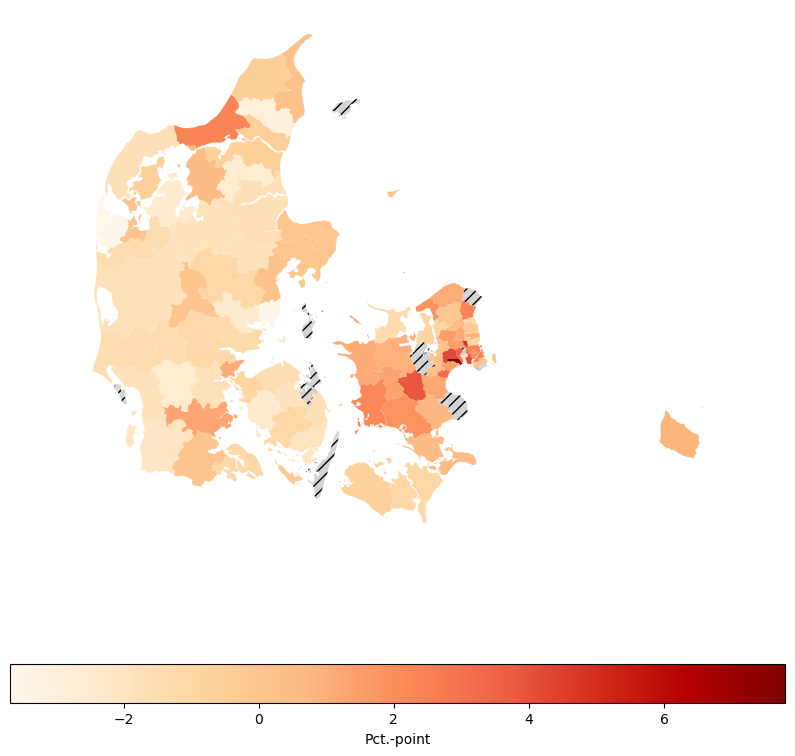

In [78]:
#laver det til geodataframe
merged_1_2 = gpd.GeoDataFrame(merged_1_1, geometry='geometry')

quantiles = [-2.5, -1, 0, 1, 2.5, 5.0]

#plotter
merged_1_2.plot(column='Estimat',
              legend = True,
              figsize=(10,10),
              cmap = 'OrRd',
              legend_kwds = {'label': "Pct.-point", 'orientation': "horizontal"},
              missing_kwds={"color": "lightgrey",  "hatch": "///",  "label": "Mangler data",},

              ).set_axis_off()


# 3) Model 2

In [11]:
filename_2 = 'Model 2 DK.xlsx'

In [12]:
pd.read_excel(filename_2)

,komkode,estimat
0,aar_2022_afd_kom_101,-0.00226
1,aar_2022_afd_kom_147,-0.01357
2,aar_2022_afd_kom_151,0.01790
3,aar_2022_afd_kom_153,0.02584
4,aar_2022_afd_kom_157,-0.04150
...,...,...
83,aar_2022_afd_kom_840,0.00460
84,aar_2022_afd_kom_846,0.02024
85,aar_2022_afd_kom_849,-0.12057
86,aar_2022_afd_kom_851,-0.01990


In [13]:
df_2 = pd.read_excel(filename_2)

In [14]:
df_2['KOMKODE'] = df_2['komkode'].str[-3:].apply(lambda x: '0'+x)
df_2.drop('komkode', axis=1, inplace=True)

In [15]:
df_2['estimat'] = df_2['estimat'].apply(lambda x: x*100)

In [16]:
merged_2_1 = pd.merge(df_2,gdf,how='outer',on=['KOMKODE'])

In [17]:
merged_2_1.head(5)

,estimat,KOMKODE,KOMNAVN,geometry
0,-0.226,0101,København,"POLYGON Z ((12.66678 55.72122 -999.00000, 12.6..."
1,-0.226,0101,København,"POLYGON Z ((12.50941 55.61309 -999.00000, 12.5..."
2,-0.226,0101,København,"POLYGON Z ((12.72910 55.70326 -999.00000, 12.7..."
3,-0.226,0101,København,"POLYGON Z ((12.55346 55.64214 -999.00000, 12.5..."
4,-0.226,0101,København,"POLYGON Z ((12.64860 55.64829 -999.00000, 12.6..."


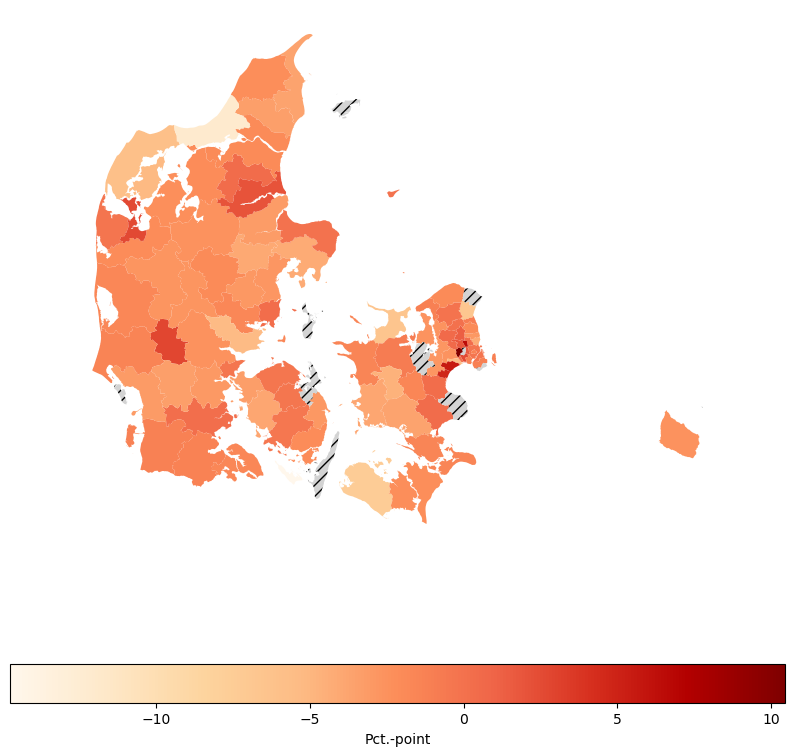

In [79]:
#laver det til geodataframe
merged_2_2 = gpd.GeoDataFrame(merged_2_1, geometry='geometry')

quantiles = [-2.5, -1, 0, 1, 2.5, 5.0]

#plotter
merged_2_2.plot(column='estimat',
              legend = True,
              figsize=(10,10),
              cmap = 'OrRd',
              legend_kwds = {'label': "Pct.-point", 'orientation': "horizontal"},
              missing_kwds={"color": "lightgrey",  "hatch": "///",  "label": "Mangler data",},
              ).set_axis_off()
